In [1]:
from scipy.stats import multivariate_normal, norm, uniform
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from numba import njit

In [2]:
b0=1.0
b1=1.0

In [3]:
def sim_a4(n, m):  # n=標本の大きさ, m=共分散
    
    rv_mean = [4, 0]  # x, uの平均
    rv_cov = [[1.0, m],   # x, uの共分散行列
               [m, 0.1]]  # Cov(x,u)=m
    
    rv = multivariate_normal.rvs(rv_mean, rv_cov, size=n)  # x1, uをnセット抽出
    x = rv[:,0]  # 説明変数
    u = rv[:,1]  # 誤差項
    y = b0 + b1*x + u  # 説明変数

    df = pd.DataFrame({'Y':y, 'X':x})  # DataFrameの作成
    res = ols(formula='Y ~ X', data=df).fit()  # OLS推定

    return x, y, u, res.params[0], res.params[1] # 返り値の設定

In [4]:
x_0, y_0, u_0, b0hat_0, b1hat_0 = sim_a4(100, m=0)

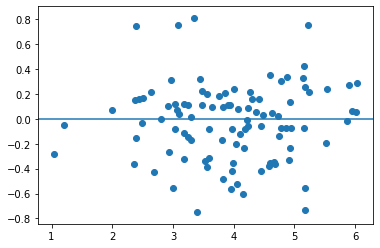

In [5]:
plt.scatter(x_0,u_0)
plt.axhline(0)
pass

In [6]:
np.corrcoef(x_0,u_0)

array([[1.        , 0.03235985],
       [0.03235985, 1.        ]])

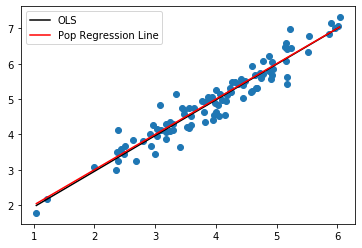

In [7]:
xx = np.linspace(min(x_0),max(x_0),100)

plt.scatter(x_0,y_0)
plt.plot(xx,b0hat_0+b1hat_0*xx, 'k', label='OLS')
plt.plot(xx,b0+b1*xx,'r', label='Pop Regression Line')
plt.legend()
pass

In [8]:
x_1, y_1, u_1, b0hat_1, b1hat_1 = sim_a4(100, m=0.25)

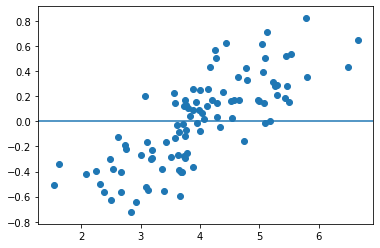

In [9]:
plt.scatter(x_1,u_1)
plt.axhline(0)
pass

In [10]:
np.corrcoef(x_1,u_1)

array([[1.       , 0.7797449],
       [0.7797449, 1.       ]])

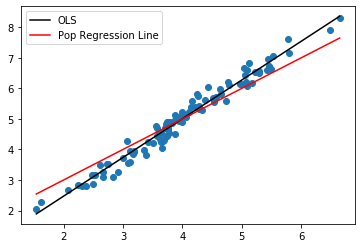

In [11]:
xx = np.linspace(min(x_1),max(x_1),100)

plt.scatter(x_1,y_1)
plt.plot(xx,b0hat_1+b1hat_1*xx, 'k', label='OLS')
plt.plot(xx,b0+b1*xx, 'r', label='Pop Regression Line')
plt.legend()
pass

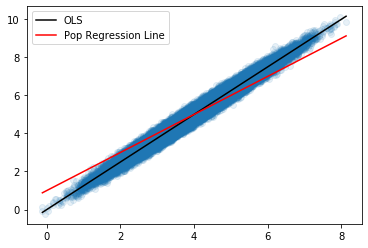

In [12]:
x_1, y_1, u_1, b0hat_1, b1hat_1 = sim_a4(100_000, m=0.25)

xx = np.linspace(min(x_1),max(x_1),100)

plt.scatter(x_1,y_1, alpha=0.1)  # 下の説明を参照
plt.plot(xx,b0hat_1+b1hat_1*xx, 'k', label='OLS')
plt.plot(xx,b0+b1*xx,'r', label='Pop Regression Line')
plt.legend()
pass

In [13]:
# 母集団のパラメータ
b0 = 1
b1 = 1
b2 = 1
b3 = 1

# 標本数
n = 1000

# 説明変数　x1, x2
x1 = np.random.normal(4, 1, size=n)
x2 = np.random.uniform(1, 10, size=n)

# 説明変数　x3
e = np.random.normal(size=n)
m = 2.0  # x1との相関性を捉える
x3 = 1 + m*x1 + e

# 母集団の誤差項
u = np.random.normal(size=n)
y = b0 + b1*x1 + b2*x2 + b3*x3 + u

# 標本のDataFrame
df_sample = pd.DataFrame({'Y':y, 'X1':x1, 'X2':x2, 'X3':x3})

# 推定
formula_omitted = 'Y ~ X1 + X2'
res_omitted = ols(formula_omitted, data=df_sample).fit()
res_omitted.params

Intercept    2.013225
X1           2.976367
X2           1.004357
dtype: float64

In [14]:
# 母集団のパラメータの値
b0 = 1
b1 = 1
b2 = 1
b3 = 1

# シミュレーションの回数
N = 10_000

In [15]:
@njit
def sim_omitted(n,m):

    # 空のリスト
    b0hat_arr = np.zeros(N)
    b1hat_arr = np.zeros(N)
    b2hat_arr = np.zeros(N)

    # 説明変数
    x1 = np.random.normal(loc=4, scale=1, size=n)
    x2 = np.random.uniform(1, 10, size=n)
    e = np.random.normal(loc=0, scale=1, size=n)
    x3 = 1 + m*x1 + e
    
    c = np.ones(n)  # 定数項
    
    for i in range(N):  # N回のループ
        # 母集団
        u = np.random.normal(loc=0, scale=1, size=n)
        y = b0 + b1*x1 + b2*x2 + b3*x3 + u
        
        X = np.stack((c,x1,x2), axis=1)  # 説明変数の行列
        bhat = np.linalg.inv((X.T)@X)@(X.T)@y  # OLS推定
        
        b0hat_arr[i] = bhat[0]
        b1hat_arr[i] = bhat[1]
        b2hat_arr[i] = bhat[2]

    return b0hat_arr, b1hat_arr, b2hat_arr

In [16]:
b0hat, b1hat, b2hat = sim_omitted(1000,m=2.0)

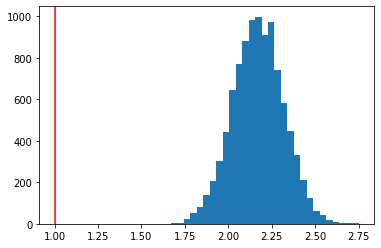

In [17]:
plt.hist(b0hat, bins=30)
plt.axvline(x=b0, color='red')
pass

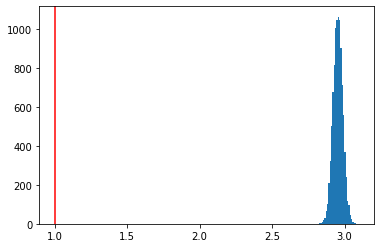

In [18]:
plt.hist(b1hat, bins=30)
plt.axvline(x=b1, color='red')
pass

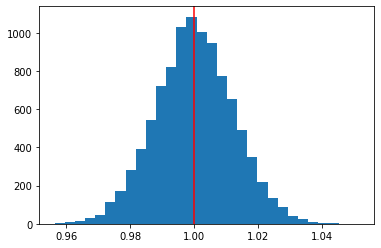

In [19]:
plt.hist(b2hat, bins=30)
plt.axvline(x=b2, color='red')
pass

In [20]:
# 標本の大きさ
n = 100

# 母集団回帰式
b0 = 1.0
b1 = 1.0
x_pop = np.random.uniform(1,10,size=n)  # 母集団の説明変数
u = np.random.normal(scale=1, size=n)  # 母集団の誤差項
y = b0 + b1*x_pop + u  # 母集団回帰式

# 測定誤差
error_sd = 3  # 測定誤差の標準偏差
x = x_pop + np.random.normal(scale=error_sd, size=n)  # 測定誤差

# OLS推定
df_sim = pd.DataFrame({'Y':y, 'X':x})  # DataFrameの作成
res_ols = ols('Y ~ X', data=df_sim).fit()  # OLS推定

res_ols.params  # OLS推定量

Intercept    4.235541
X            0.385910
dtype: float64

In [21]:
# 真のパラメータ
b0 = 1.0
b1 = 1.0

# シミュレーションの回数
N = 100_000

In [22]:
@njit
def sim_measure(n):
    
    b0hat_arr = np.zeros(N)
    b1hat_arr = np.zeros(N)

    x_pop = np.random.uniform(1,10,size=n)  # 母集団の説明変数
    
    c = np.ones(n)  # 定数項
        
    # 説明変数の測定誤差
    error_sd = 3  # 測定誤差の標準偏差
    x = x_pop + np.random.normal(loc=0, scale=error_sd, size=n)  # 測定誤差

    for i in range(N):
        u = np.random.normal(loc=0, scale=1, size=n)  # 母集団の誤差項
        y = b0 + b1*x_pop + u  # 母集団回帰式
        
        X = np.stack((c,x), axis=1)  # 説明変数の行列
        bhat = np.linalg.inv((X.T)@X)@(X.T)@y  # OLS推定
        
        b0hat_arr[i] = bhat[0]
        b1hat_arr[i] = bhat[1]

    return b0hat_arr, b1hat_arr

In [23]:
b0hat, b1hat = sim_measure(100)

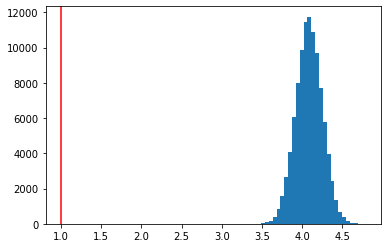

In [24]:
plt.hist(b0hat,bins=30)
plt.axvline(x=b0,color='red')
pass

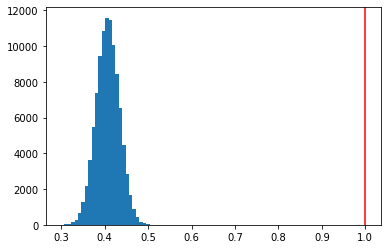

In [25]:
plt.hist(b1hat,bins=30)
plt.axvline(x=b1,color='red')
pass

In [26]:
s0 = 1.0
s1 = 0.5

d0 = 1.5
d1 = -1
d2 = 2.0

In [27]:
n = 10_000

In [28]:
xd = np.random.uniform(1,10,size=n)  # 説明変数
ud = np.random.normal(loc=0, scale=1, size=n)  # 母集団の誤差項
us = np.random.normal(loc=0, scale=2, size=n)  # 母集団の誤差項

In [29]:
l = (s0+s1*d0)/(1-s1*d1) + (s1*d2/(1-s1*d1))*xd + (s1*ud+us)/(1-s1*d1)

In [30]:
w = (d0+d1*s0)/(1-s1*d1) + d2*xd + (d1*us+ud)/(1-s1*d1)

In [31]:
df_simul = pd.DataFrame({'W':w, 'L':l, 'Xd':xd})  # DataFrameの作成

res_ols = ols('W ~ L + Xd', data=df_simul).fit()  # OLS推定

res_ols.params  # OLS推定量

Intercept    1.316125
L           -0.814283
Xd           2.539114
dtype: float64

In [32]:
print(f'd0の真の値：{d0}\t\td0の推定量：{res_ols.params[0]}')
print(f'd1の真の値：{d1}\t\td1の推定量：{res_ols.params[1]}')
print(f'd2の真の値：{d2}\t\td2の推定量：{res_ols.params[2]}')

d0の真の値：1.5		d0の推定量：1.3161247026109222
d1の真の値：-1		d1の推定量：-0.8142834657385614
d2の真の値：2.0		d2の推定量：2.539113833161857


In [33]:
s0 = 1.0
s1 = 0.5

d0 = 1.5
d1 = -1
d2 = 2.0

In [34]:
N = 100_000

In [35]:
@njit
def sim_simul(n):
    
    b0hat_arr = np.zeros(N)
    b1hat_arr = np.zeros(N)
    b2hat_arr = np.zeros(N)

    xd = np.random.uniform(1, 10, size=n)  # 説明変数
    
    c = np.ones(n)  # 定数項
    
    for i in range(N):
        # 母集団の誤差項
        ud = np.random.normal(loc=0, scale=1, size=n)
        
        # 母集団の誤差項
        us = np.random.normal(loc=0, scale=2, size=n)
        
        # 母集団の労働供給曲線
        l = (s0+s1*d0)/(1-s1*d1) + (s1*d2/(1-s1*d1))*xd + (s1*ud+us)/(1-s1*d1)
        
        # 母集団の労働需要曲線
        w = (d0+d1*s0)/(1-s1*d1) + d2*xd + (d1*us+ud)/(1-s1*d1)

        # 説明変数の行列
        X = np.stack((c,l,xd), axis=1)
        
        # 労働需要曲線を使い賃金をOLS推定
        bhat = np.linalg.inv((X.T)@X)@(X.T)@w  # OLS推定
        
        b0hat_arr[i] = bhat[0]
        b1hat_arr[i] = bhat[1]
        b2hat_arr[i] = bhat[2]

    return b0hat_arr, b1hat_arr, b2hat_arr

In [36]:
b0hat, b1hat, b2hat = sim_simul(100)

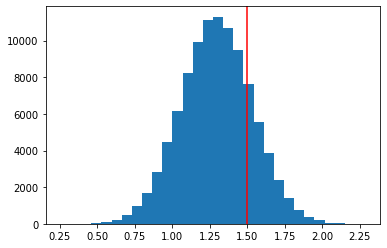

In [37]:
plt.hist(b0hat,bins=30)
plt.axvline(x=d0,color='red')
pass

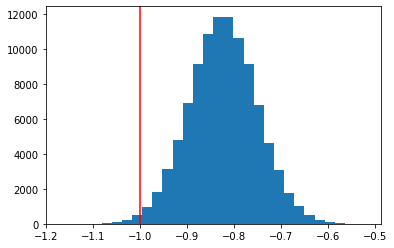

In [38]:
plt.hist(b1hat,bins=30)
plt.axvline(x=d1,color='red')
pass

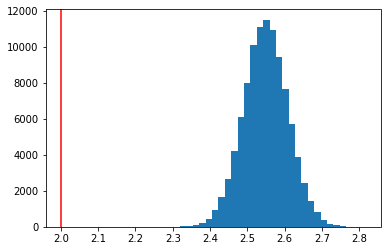

In [39]:
plt.hist(b2hat,bins=30)
plt.axvline(x=d2,color='red')
pass